In [1]:
import pandas as pd
df = pd.read_pickle('./data/all_data.pkl')
df.shape

(141971, 21)

In [5]:
from data_clean_script import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanmurray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ryanmurray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
clean_df(df,filename='cleaned_data')

In [9]:
cleaned = pd.read_pickle('./data/cleaned_data.pkl')

In [14]:
X,y = split_with_bow()

In [15]:
X_train_scaled,X_test_scaled,y_train,y_test = rescale_train_test(X,y)

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


lr.fit(X_train_scaled,y_train)
y_preds = lr.predict_proba(X_test_scaled)[:,1]

fpr, tpr,thresh = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

Text(0,0.5,'TPR')

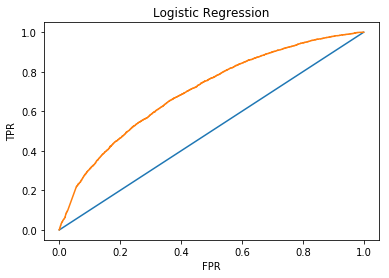

In [18]:
plt.figure()
# Plotting our Baseline..
plt.title('Logistic Regression')

plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()